In [5]:
import pandas as pd
df = pd.read_csv("/content/athlete_events.csv")
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [7]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [8]:
df1 = df.copy()
df1.drop(columns=['ID'],inplace=True,axis=1)
df1.head(1)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


In [9]:
df1.describe()

,Age,Height,Weight,Year
count,261642.000000,210945.000000,208241.000000,271116.000000
mean,25.556898,175.338970,70.702393,1978.378480
std,6.393561,10.518462,14.348020,29.877632
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


In [10]:
df1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
271111    False
271112    False
271113    False
271114    False
271115    False
Length: 271116, dtype: bool

In [ ]:
df1.isnull().sum()

Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [ ]:
#insights
#missing values in:
#Age         9474
#Height     60171
#Weight     62875
#Medal     231333 (maybe they dont gain any medals) we can fill it by zero

In [11]:
df_numerical_features = df1.select_dtypes(include='number')
df_numerical_features.columns

Index(['Age', 'Height', 'Weight', 'Year'], dtype='object')

In [12]:
df_numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Age     261642 non-null  float64
 1   Height  210945 non-null  float64
 2   Weight  208241 non-null  float64
 3   Year    271116 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 8.3 MB


In [13]:
df_categorical_features = df1.select_dtypes(include='object')
df_categorical_features.columns

Index(['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')

In [14]:
df_categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Name    271116 non-null  object
 1   Sex     271116 non-null  object
 2   Team    271116 non-null  object
 3   NOC     271116 non-null  object
 4   Games   271116 non-null  object
 5   Season  271116 non-null  object
 6   City    271116 non-null  object
 7   Sport   271116 non-null  object
 8   Event   271116 non-null  object
 9   Medal   39783 non-null   object
dtypes: object(10)
memory usage: 20.7+ MB


In [ ]:
df_categorical_features['Games'].unique()
print(len(df_categorical_features['Games'].unique()))

51


In [ ]:
df_categorical_features['Games'].value_counts()

2000 Summer    13821
1996 Summer    13780
2016 Summer    13688
2008 Summer    13602
2004 Summer    13443
1992 Summer    12977
2012 Summer    12920
1988 Summer    12037
1972 Summer    10304
1984 Summer     9454
1976 Summer     8641
1968 Summer     8588
1952 Summer     8270
1960 Summer     8119
1964 Summer     7702
1980 Summer     7191
1936 Summer     6506
1948 Summer     6405
1924 Summer     5233
1956 Summer     5127
1928 Summer     4992
2014 Winter     4891
2010 Winter     4402
2006 Winter     4382
1920 Summer     4292
2002 Winter     4109
1912 Summer     4040
1998 Winter     3605
1992 Winter     3436
1994 Winter     3160
1908 Summer     3101
1932 Summer     2969
1988 Winter     2639
1984 Winter     2134
1900 Summer     1936
1968 Winter     1891
1976 Winter     1861
1964 Winter     1778
1980 Winter     1746
1906 Summer     1733
1972 Winter     1655
1956 Winter     1307
1904 Summer     1301
1960 Winter     1116
1952 Winter     1088
1948 Winter     1075
1936 Winter      895
1928 Winter  

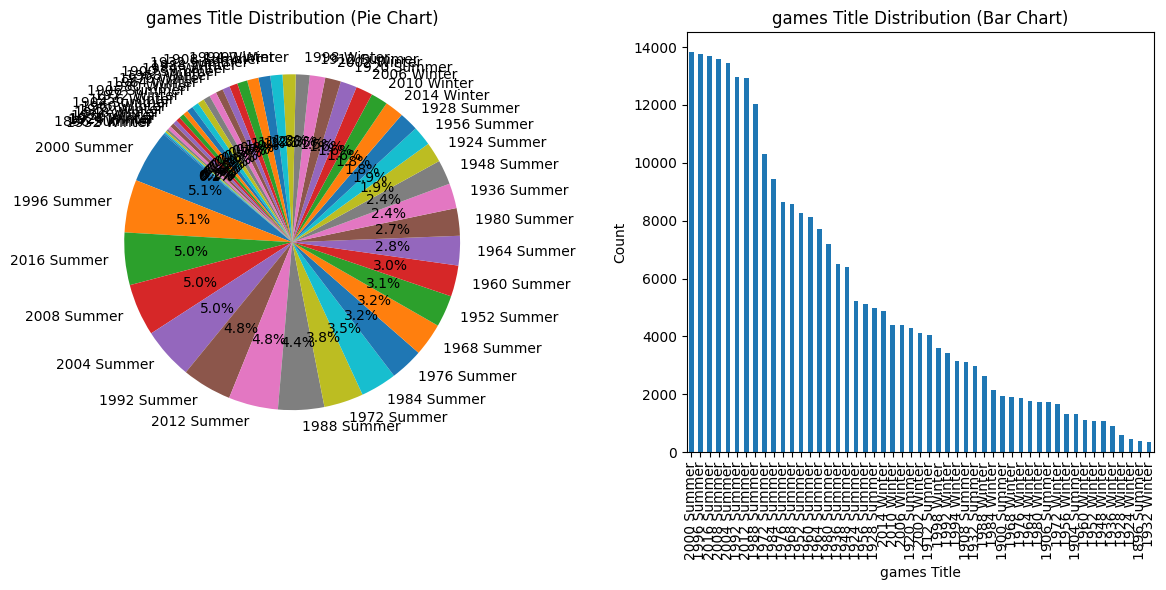

In [ ]:
games_counts = df_categorical_features['Games'].value_counts()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
axes[0].pie(games_counts, labels=games_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('games Title Distribution (Pie Chart)')

# Bar chart
games_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('games Title Distribution (Bar Chart)')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('games Title')

plt.tight_layout()
plt.show()

In [ ]:
df_categorical_features['Sex'].unique()
print(len(df_categorical_features['Sex'].unique()))

2


In [ ]:
df_categorical_features['Sex'].value_counts()

M    196594
F     74522
Name: Sex, dtype: int64

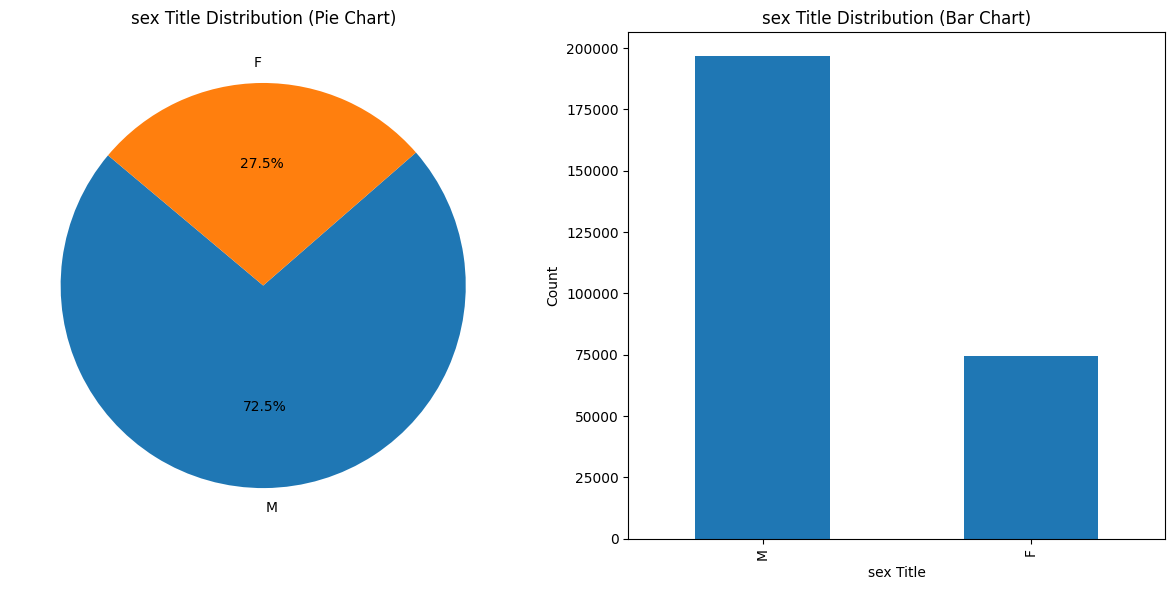

In [ ]:
sex_counts = df_categorical_features['Sex'].value_counts()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
axes[0].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('sex Title Distribution (Pie Chart)')

# Bar chart
sex_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('sex Title Distribution (Bar Chart)')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('sex Title')

plt.tight_layout()
plt.show()

In [ ]:
df_categorical_features['Sport'].unique()
print(len(df_categorical_features['Sport'].unique()))

66


In [ ]:
df_categorical_features['Sport'].value_counts()

Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10859
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: Sport, Length: 66, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

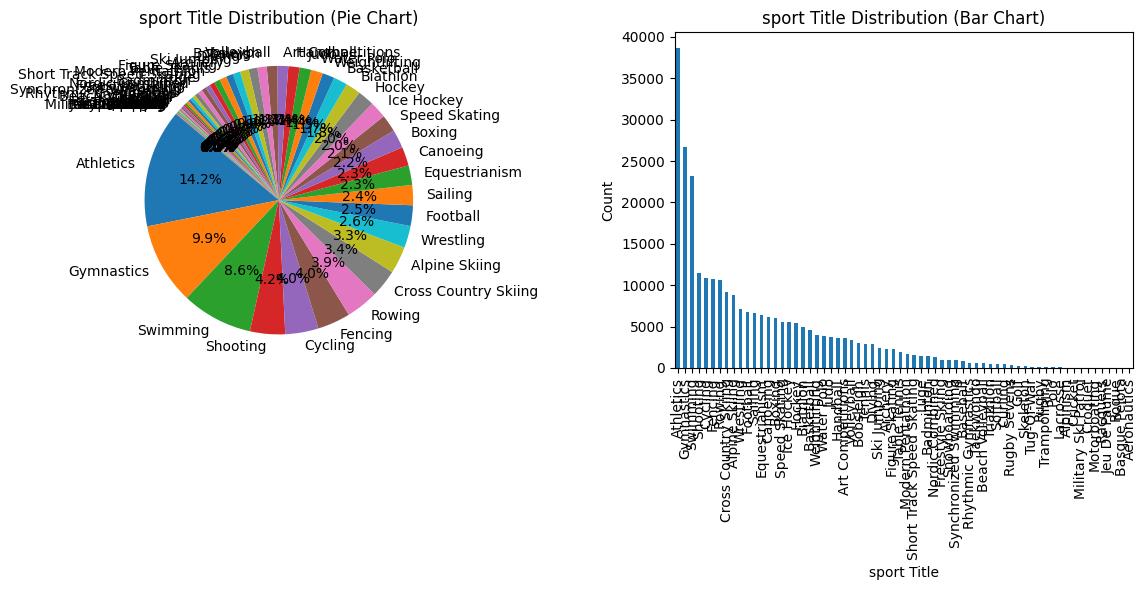

In [ ]:
sport_counts = df_categorical_features['Sport'].value_counts()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
axes[0].pie(sport_counts, labels=sport_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('sport Title Distribution (Pie Chart)')

# Bar chart
sport_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('sport Title Distribution (Bar Chart)')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('sport Title')

plt.tight_layout()
plt.show()

In [ ]:
df_categorical_features['Event'].unique()
print(len(df_categorical_features['Event'].unique()))

765


In [ ]:
df_categorical_features['Event'].value_counts()

Football Men's Football                                5733
Ice Hockey Men's Ice Hockey                            4762
Hockey Men's Hockey                                    3958
Water Polo Men's Water Polo                            3358
Basketball Men's Basketball                            3280
                                                       ... 
Croquet Mixed Doubles                                     2
Archery Men's Target Archery, 50 metres, Individual       2
Archery Men's Target Archery, 33 metres, Individual       2
Archery Men's Target Archery, 28 metres, Individual       2
Aeronautics Mixed Aeronautics                             1
Name: Event, Length: 765, dtype: int64

In [18]:
import matplotlib.pyplot as plt

<ipython-input-31-02c23419c79e>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


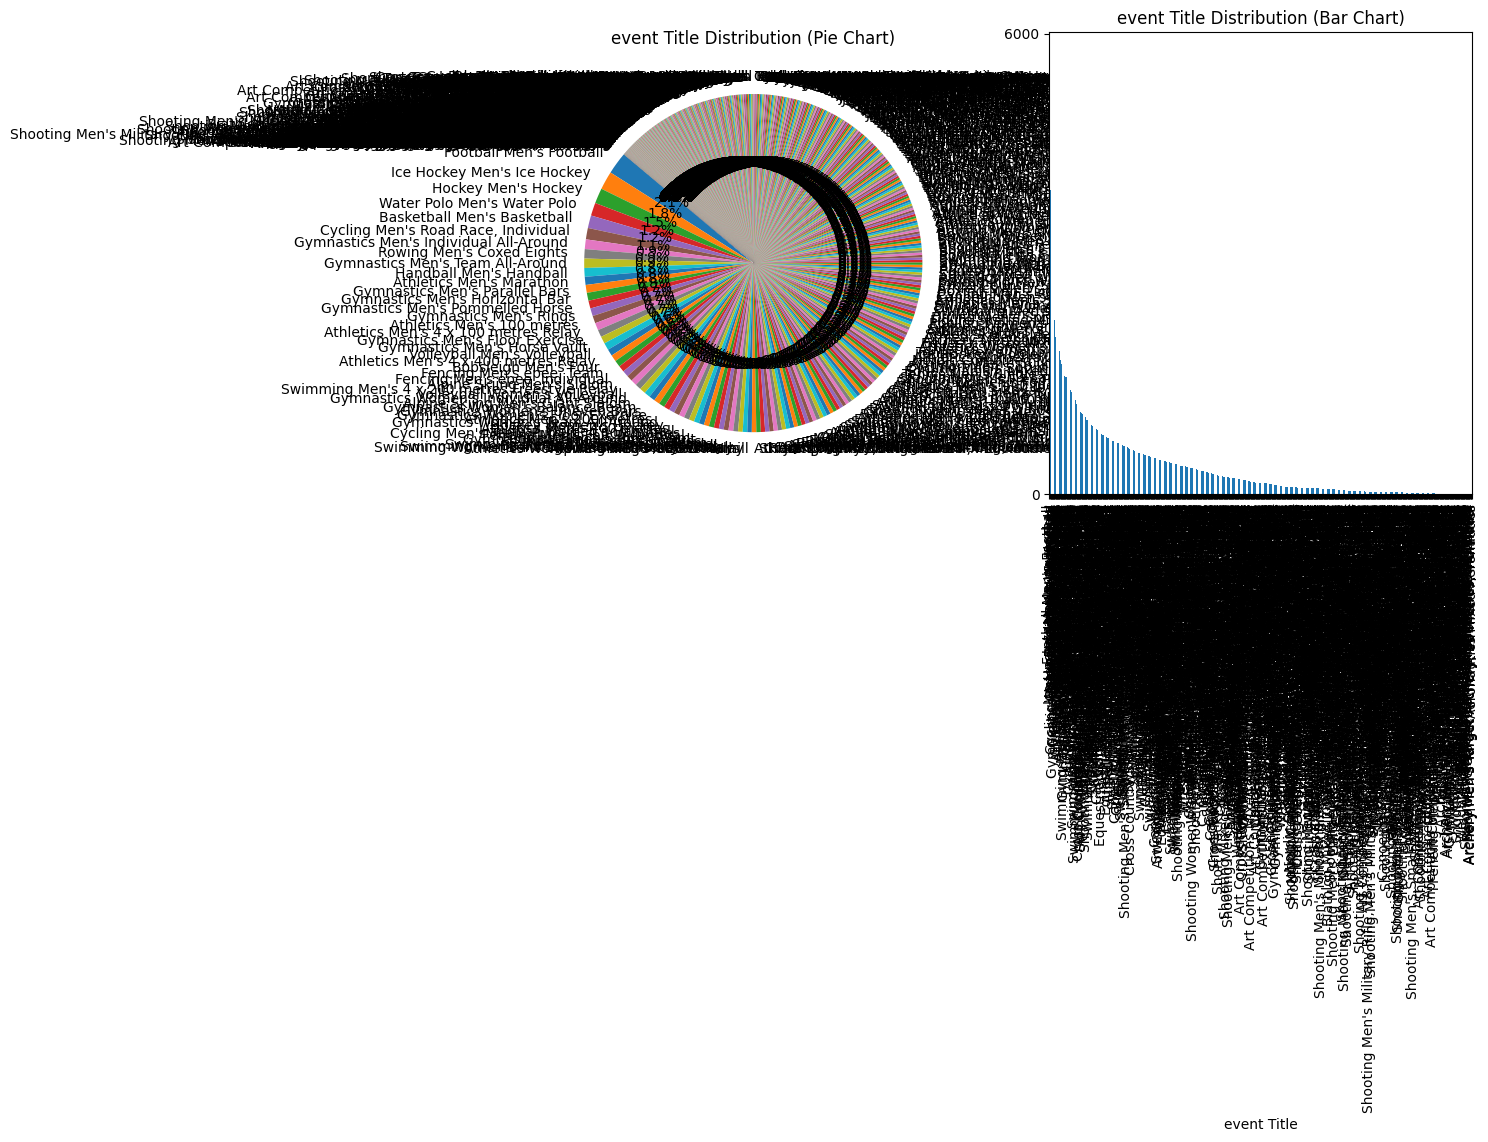

In [ ]:
event_counts = df_categorical_features['Event'].value_counts()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
axes[0].pie(event_counts, labels=event_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('event Title Distribution (Pie Chart)')

# Bar chart
event_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('event Title Distribution (Bar Chart)')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('event Title')

plt.tight_layout()
plt.show()

In [ ]:
df_categorical_features['Medal'].unique()
print(len(df_categorical_features['Medal'].unique()))

4


In [ ]:
df_categorical_features['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

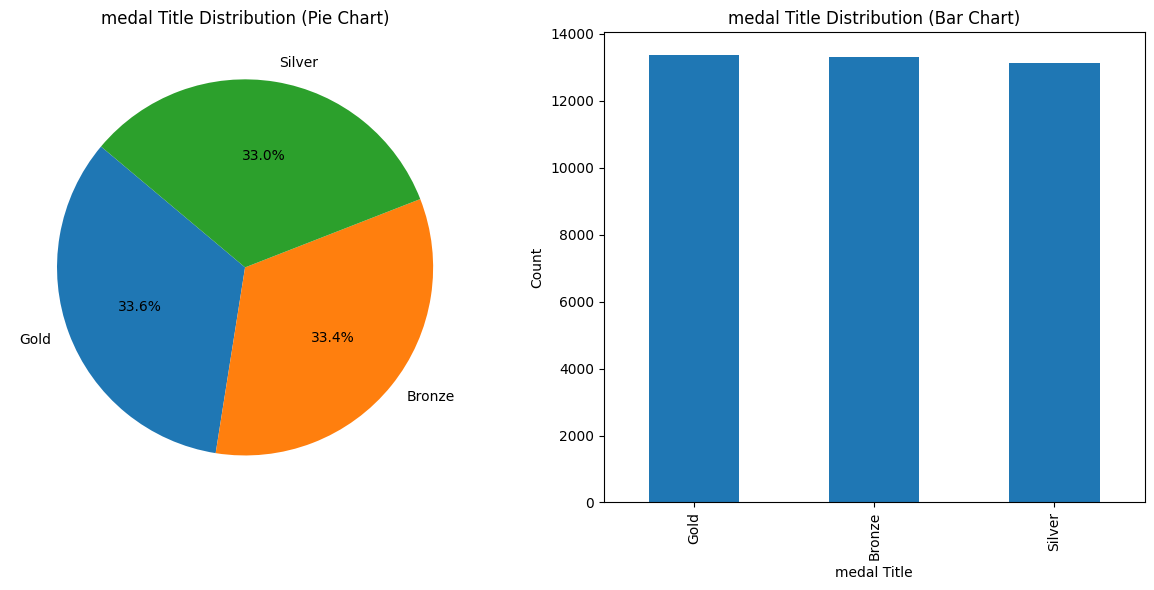

In [ ]:
medal_counts = df_categorical_features['Medal'].value_counts()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
axes[0].pie(medal_counts, labels=medal_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('medal Title Distribution (Pie Chart)')

# Bar chart
medal_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('medal Title Distribution (Bar Chart)')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('medal Title')

plt.tight_layout()
plt.show()

In [ ]:
df_categorical_features['City'].unique()
print(len(df_categorical_features['City'].unique()))

42


In [ ]:
df_categorical_features['City'].value_counts()

London                    22426
Athina                    15556
Sydney                    13821
Atlanta                   13780
Rio de Janeiro            13688
Beijing                   13602
Barcelona                 12977
Los Angeles               12423
Seoul                     12037
Munich                    10304
Montreal                   8641
Mexico City                8588
Helsinki                   8270
Roma                       8119
Tokyo                      7702
Moskva                     7191
Paris                      7169
Berlin                     6506
Amsterdam                  4992
Sochi                      4891
Melbourne                  4829
Vancouver                  4402
Torino                     4382
Stockholm                  4338
Antwerpen                  4292
Salt Lake City             4109
Innsbruck                  3639
Nagano                     3605
Albertville                3436
Lillehammer                3160
Calgary                    2639
Sarajevo

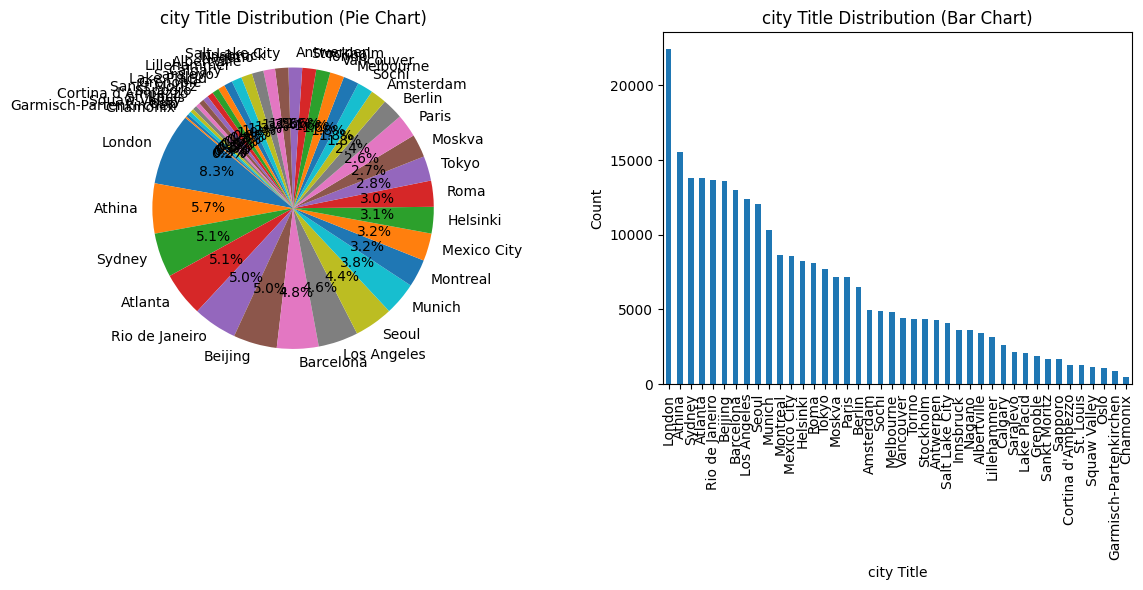

In [ ]:
city_counts = df_categorical_features['City'].value_counts()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
axes[0].pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('city Title Distribution (Pie Chart)')

# Bar chart
city_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('city Title Distribution (Bar Chart)')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('city Title')

plt.tight_layout()
plt.show()

In [ ]:
df_categorical_features['Team'].unique()
print(len(df_categorical_features['Team'].unique()))

1184


In [ ]:
df_categorical_features['Team'].value_counts()

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
                 ...  
Briar                1
Hannover             1
Nan-2                1
Brentina             1
Digby                1
Name: Team, Length: 1184, dtype: int64

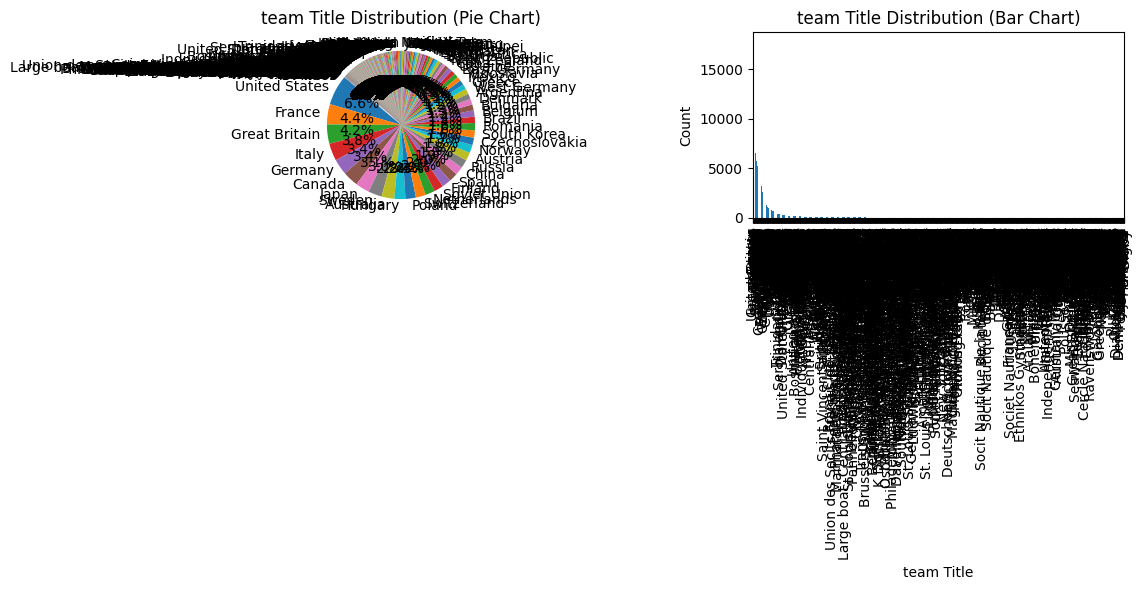

In [ ]:
team_counts = df_categorical_features['Team'].value_counts()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
axes[0].pie(team_counts, labels=team_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('team Title Distribution (Pie Chart)')

# Bar chart
team_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('team Title Distribution (Bar Chart)')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('team Title')

plt.tight_layout()
plt.show()

In [25]:
df_categorical_features['NOC'].unique()
print(len(df_categorical_features['NOC'].unique()))

230


In [26]:
df_categorical_features['NOC'].value_counts()

USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
       ...  
YMD        5
SSD        3
UNK        2
NBO        2
NFL        1
Name: NOC, Length: 230, dtype: int64

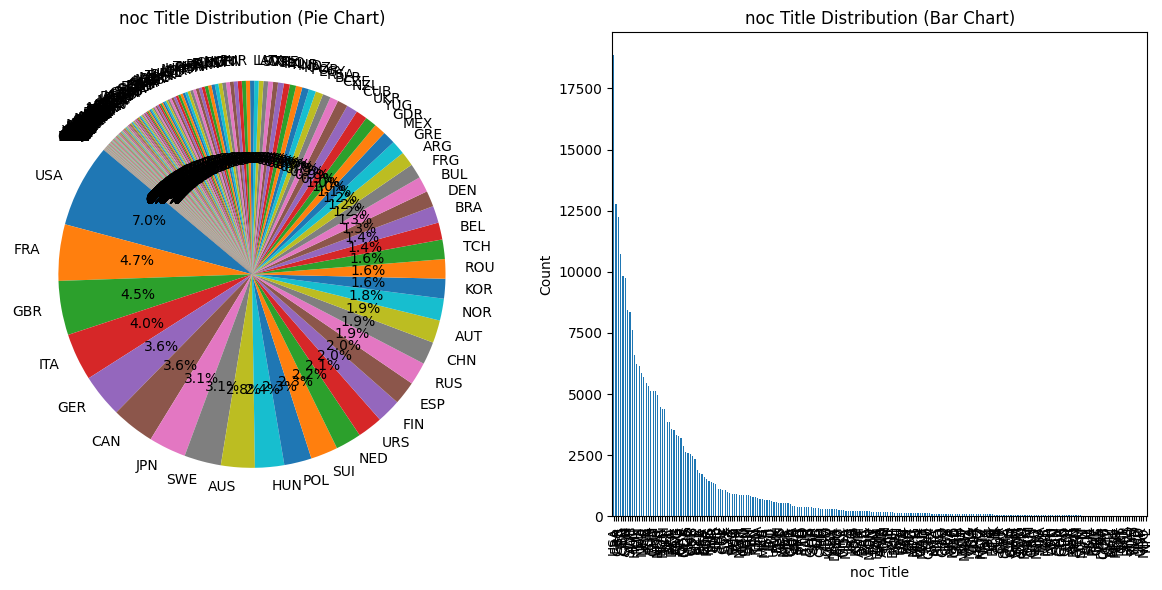

In [20]:
noc_counts = df_categorical_features['NOC'].value_counts()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
axes[0].pie(noc_counts, labels=noc_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('noc Title Distribution (Pie Chart)')

# Bar chart
noc_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('noc Title Distribution (Bar Chart)')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('noc Title')

plt.tight_layout()
plt.show()

In [27]:
df_categorical_features['Season'].unique()
print(len(df_categorical_features['Season'].unique()))

2


In [23]:
df_categorical_features['Season'].value_counts()

Summer    222552
Winter     48564
Name: Season, dtype: int64

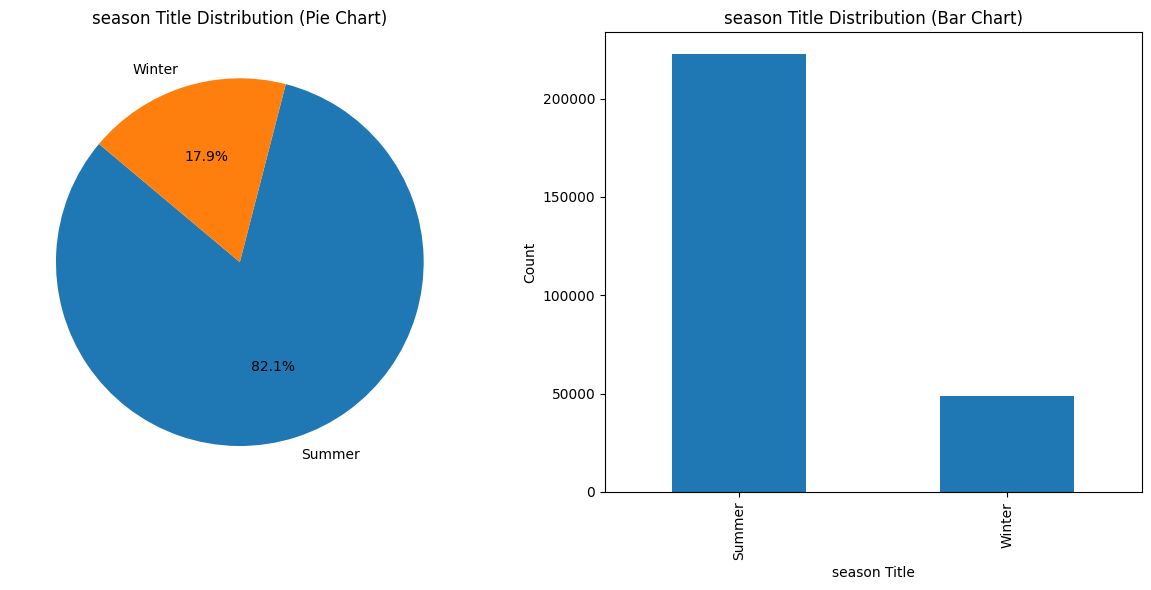

In [24]:
season_counts = df_categorical_features['Season'].value_counts()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
axes[0].pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('season Title Distribution (Pie Chart)')

# Bar chart
season_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('season Title Distribution (Bar Chart)')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('season Title')

plt.tight_layout()
plt.show()

In [28]:
df_categorical_features = df[['Games','Season','NOC','Team','City','Medal','Event','Sport']]
df_categorical_features.head(1)

,Games,Season,NOC,Team,City,Medal,Event,Sport
0,1992 Summer,Summer,CHN,China,Barcelona,NaN,Basketball Men's Basketball,Basketball


In [29]:
for i in df_categorical_features.columns:
   print(i)
   print("the value are")
   print(df_categorical_features[i].value_counts())

Games
the value are
2000 Summer    13821
1996 Summer    13780
2016 Summer    13688
2008 Summer    13602
2004 Summer    13443
1992 Summer    12977
2012 Summer    12920
1988 Summer    12037
1972 Summer    10304
1984 Summer     9454
1976 Summer     8641
1968 Summer     8588
1952 Summer     8270
1960 Summer     8119
1964 Summer     7702
1980 Summer     7191
1936 Summer     6506
1948 Summer     6405
1924 Summer     5233
1956 Summer     5127
1928 Summer     4992
2014 Winter     4891
2010 Winter     4402
2006 Winter     4382
1920 Summer     4292
2002 Winter     4109
1912 Summer     4040
1998 Winter     3605
1992 Winter     3436
1994 Winter     3160
1908 Summer     3101
1932 Summer     2969
1988 Winter     2639
1984 Winter     2134
1900 Summer     1936
1968 Winter     1891
1976 Winter     1861
1964 Winter     1778
1980 Winter     1746
1906 Summer     1733
1972 Winter     1655
1956 Winter     1307
1904 Summer     1301
1960 Winter     1116
1952 Winter     1088
1948 Winter     1075
1936 Winter   

In [34]:
for i in df_categorical_features.columns:
  counts = df_categorical_features[i].value_counts()

  # Plotting
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  # Pie chart
  axes[0].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
  axes[0].set_title(i)

  # Bar chart
  counts.plot(kind='bar', ax=axes[1])
  axes[1].set_title(i)
  axes[1].set_ylabel('Count')
  axes[1].set_xlabel(i)

  plt.tight_layout()
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

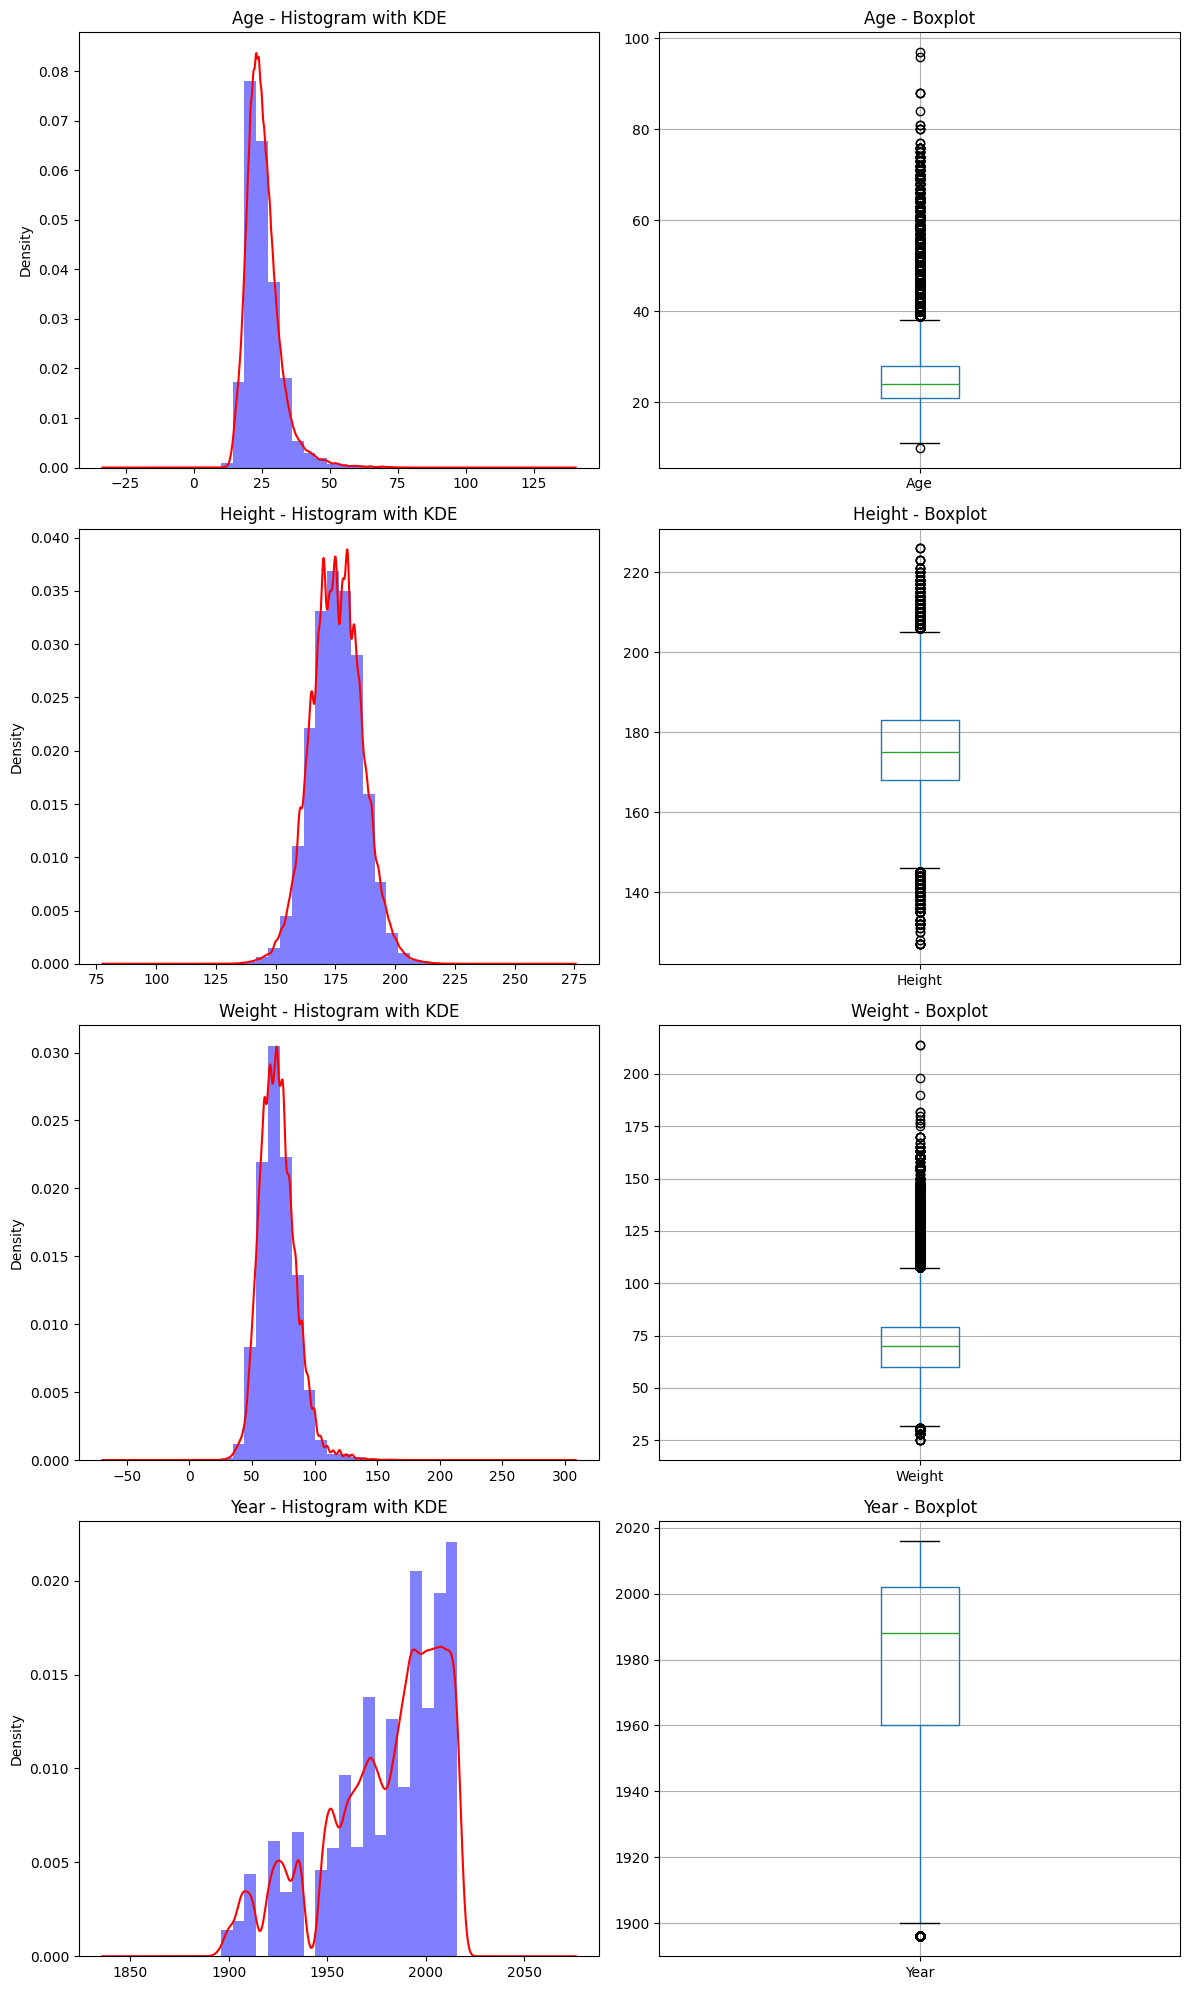

In [35]:
# Assuming 'df_numerical_features' is a DataFrame with numerical columns.
# We will create a sample DataFrame to simulate this scenario.

import numpy as np

# Sample data creation
np.random.seed(0)

# Plotting Histogram with KDE and Boxplot for each numerical feature
fig, axes = plt.subplots(len(df_numerical_features.columns), 2, figsize=(12, 5 * len(df_numerical_features.columns)))

for i, col in enumerate(df_numerical_features.columns):
    # Histogram with KDE
    df_numerical_features[col].plot(kind='hist', density=True, ax=axes[i, 0], bins=20, alpha=0.5, color='blue')
    df_numerical_features[col].plot(kind='kde', ax=axes[i, 0], color='red')
    axes[i, 0].set_title(f'{col} - Histogram with KDE')

    # Boxplot
    df_numerical_features.boxplot(column=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} - Boxplot')

plt.tight_layout()
plt.show()


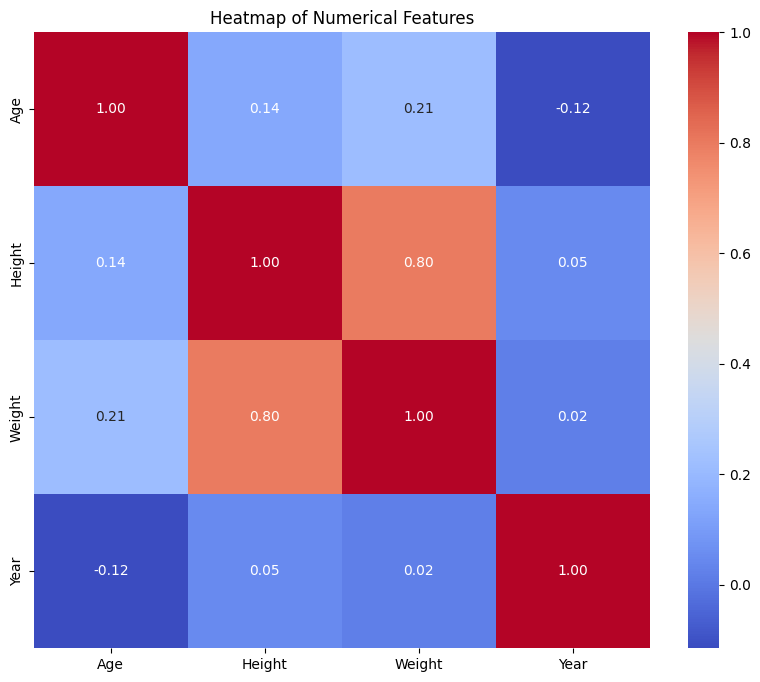

In [36]:
import seaborn as sns
corr = df_numerical_features.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap of Numerical Features')
plt.show()

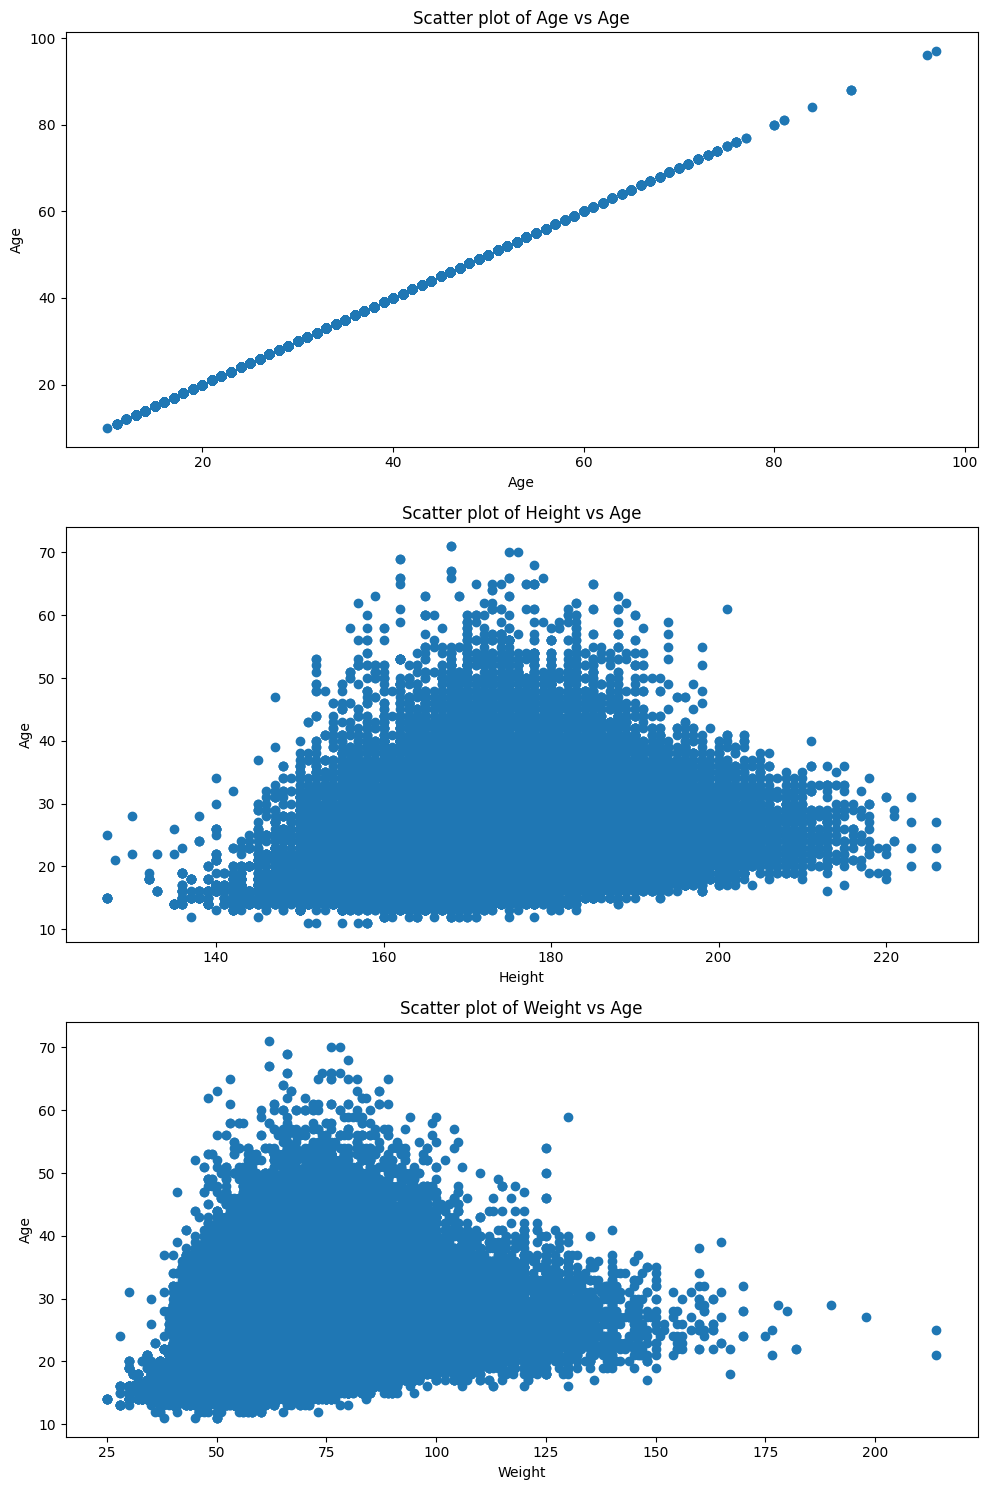

In [44]:
# scatter
n_features = df_numerical_features.shape[1] - 1
fig, axs = plt.subplots(n_features, figsize=(10, n_features * 5))

for i, feature in enumerate(df_numerical_features.columns[:-1]):
    axs[i].scatter(df_numerical_features[feature], df_numerical_features['Age'])
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Age')
    axs[i].set_title(f'Scatter plot of {feature} vs Age')

plt.tight_layout()
plt.show()
